import os
os.chdir('Data')

import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import random
from IPython.display import Image
random_num=122

In [6]:
df=pd.read_csv("results.csv")
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [7]:
df.describe()

,home_score,away_score
count,43752.000000,43752.000000
mean,1.740126,1.180129
std,1.749672,1.397021
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [8]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

([<matplotlib.axis.XTick at 0x13e3a836df0>,
 [Text(1, 0, 'Home Score'), Text(2, 0, 'Away Score')])

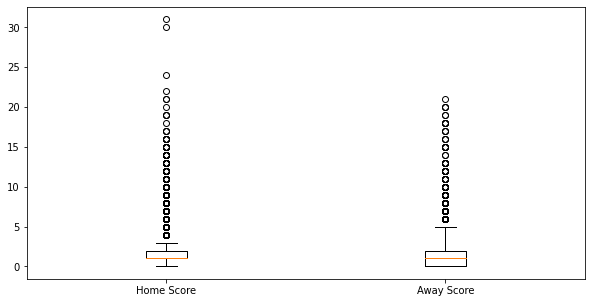

In [9]:
fig = plt.figure(figsize =(10, 5))
plt.boxplot([df["home_score"],df["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

In [10]:
higher_home=15
higher_away=15
df=df[(df["home_score"]<higher_home) & (df["away_score"]<higher_away)]
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
conditions  = [df["home_score"] ==df["away_score"], df["home_score"] > df["away_score"] , df["home_score"] < df["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
df["Win_Statues"] = np.select(conditions, choices)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win


In [12]:
countries=df.home_team.unique()
print(f"There are {len(countries)} Countries in the home_team Column\n")

There are 304 Countries in the home_team Column



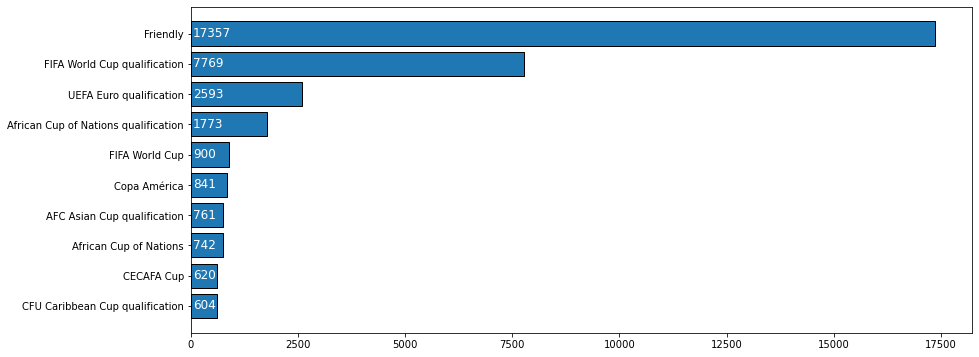

In [13]:
rank_bound = 10
ax = df.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

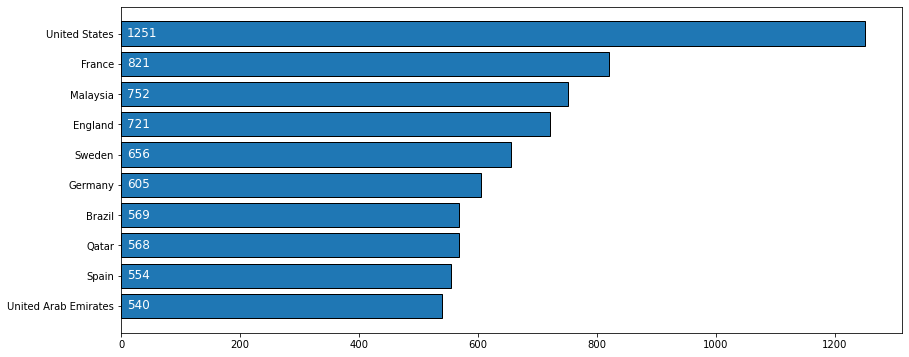

In [14]:
rank_bound = 10
ax = df.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

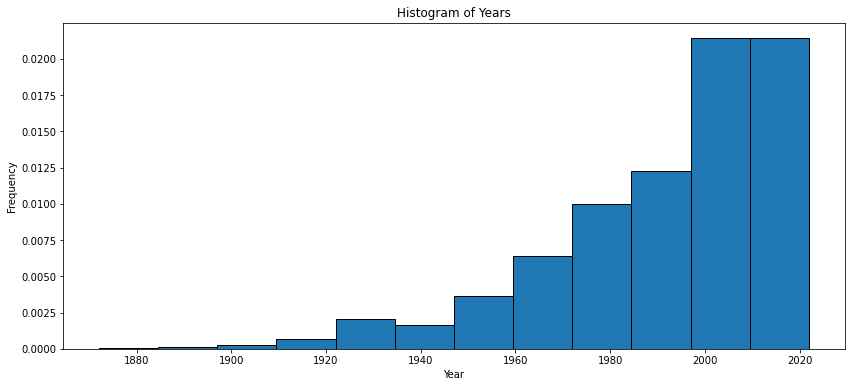

In [15]:
years = []
for date in df.date:
    years.append(int(str(date)[0:4]))
plt.figure(figsize=(14,6))
plt.hist(years, density=True, bins=12, edgecolor="k")
plt.title("Histogram of Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.show()

In [16]:
# home team이 승리한 경우

data_home=df.loc[df["home_team"]==df["country"] ]
data_home=df.loc[df["tournament"] != "Friendly"]
data_home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Ireland,False,Lost
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,Win
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Ireland,False,Lost
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,Win
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,Lost


In [17]:
tournament_df=pd.crosstab(data_home["tournament"], data_home["Win_Statues"],margins=True)
tournament_df=tournament_df.sort_values("All",ascending=False).head(10)
tournament_df.style.bar(color="red",subset=["Draw","Lost","Win","All"])

Win_Statues,Draw,Lost,Win,All
tournament,,,,
All,5731,7531,13082,26344
FIFA World Cup qualification,1644,2137,3988,7769
UEFA Euro qualification,510,818,1265,2593
African Cup of Nations qualification,432,363,978,1773
FIFA World Cup,199,290,411,900
Copa América,181,230,430,841
AFC Asian Cup qualification,126,188,447,761
African Cup of Nations,209,200,333,742
CECAFA Cup,147,185,288,620


Text(0.5, 1.0, 'Home Team Winning Status')

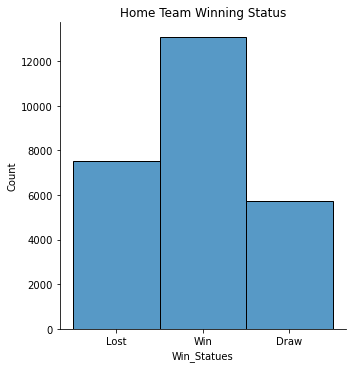

In [18]:
sns.displot(data_home, x="Win_Statues")
plt.title("Home Team Winning Status")

In [19]:
data_home['Win_Statues'].value_counts()

Win     13082
Lost     7531
Draw     5731
Name: Win_Statues, dtype: int64

In [20]:
teams_win_statues=pd.crosstab(df["home_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_win_statues["team_win_probability"]=teams_win_statues["Win"]/(teams_win_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_win_statues_100=teams_win_statues.loc[teams_win_statues["Total"]>200]
teams_win_statues_100=teams_win_statues_100.sort_values("team_win_probability",ascending=False)
teams_win_statues_100.head(20).style.bar(color="orange",subset="team_win_probability")

Win_Statues,Draw,Lost,Win,Total,team_win_probability
home_team,,,,,
Brazil,110,58,421,589,0.714771
Spain,70,50,256,376,0.680851
Argentina,124,68,372,564,0.659574
Egypt,68,74,252,394,0.639594
Ivory Coast,67,35,181,283,0.639576
Iran,62,43,183,288,0.635417
Nigeria,69,36,175,280,0.625000
Germany,112,85,327,524,0.624046
Italy,123,52,290,465,0.623656


In [21]:
teams_away_statues=pd.crosstab(df["away_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_away_statues["team_win_probability"]=teams_away_statues["Lost"]/(teams_away_statues["Total"])
#Lets take teams which plays atleast 200 games
teams_away_statues_100=teams_away_statues.loc[teams_away_statues["Total"]>200]
teams_away_statues_100=teams_away_statues_100.sort_values("team_win_probability",ascending=False)
teams_away_statues_100.rename(columns={'Lost': 'Win'}, index={'Win': 'Lost'}, inplace=True)

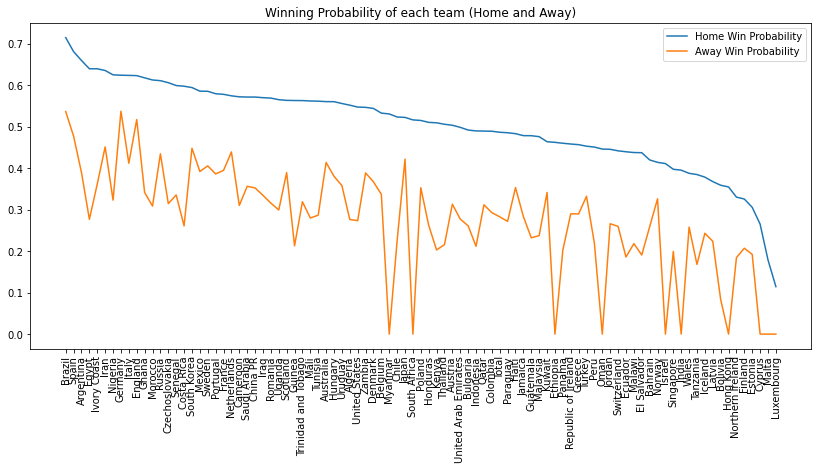

In [22]:
win_prob={teams_win_statues_100.iloc[i,:].name:[teams_win_statues_100.iloc[i,4]] for i in range(teams_win_statues_100.shape[0])}
for i in range(teams_away_statues_100.shape[0]):
    try:
        win_prob[teams_away_statues_100.iloc[i,:].name].append(teams_away_statues_100.iloc[i,4]) 
    except:
        pass
country_names=win_prob.keys()
lst_home=[i[0] for i in win_prob.values()]

lst_away=[]
for i in win_prob.values():
    if len(i)==2:
        lst_away.append(i[1])
    else:
        lst_away.append(0)

plt.figure(figsize=(14,6))
plt.plot(country_names,lst_home, label = "Home Win Probability")
plt.plot(country_names, lst_away, label = "Away Win Probability")
plt.xticks(rotation = 90)
plt.title("Winning Probability of each team (Home and Away)")
plt.legend()
plt.show()

In [23]:
df_match=df.copy() 

In [24]:
New_Dataset_part_1=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,1],df_match.values[:,2],df_match.values[:,3],df_match.values[:,4])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
New_Dataset_part_2=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,2],df_match.values[:,1],df_match.values[:,4],df_match.values[:,3])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
New_Dataset=pd.concat([New_Dataset_part_1,New_Dataset_part_2],axis=0)
New_Dataset =New_Dataset.sample(frac=1).reset_index(drop=True)
New_Dataset.head(5)

,year,Country,team_1,team_2,team_1_score,team_2_score
0,2017,Latvia,Latvia,Portugal,0,3
1,1986,Singapore,Canada,North Korea,0,2
2,1982,Barbados,Barbados,Bermuda,2,1
3,1997,Paraguay,Bolivia,Paraguay,1,2
4,2013,Tunisia,Sierra Leone,Tunisia,1,2


In [25]:
teams_1=New_Dataset.team_1.unique()
contries=New_Dataset.Country.unique()
all_countries=np.unique(np.concatenate((teams_1,contries), axis=0))
len(all_countries)

344

,year,team_1_score,team_2_score
year,1.000000,-0.126099,-0.126099
team_1_score,-0.126099,1.000000,-0.162257
team_2_score,-0.126099,-0.162257,1.000000


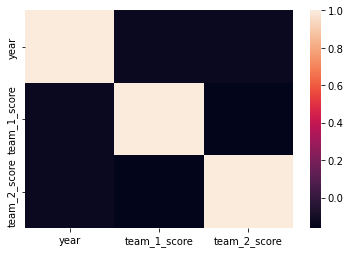

In [26]:
sns.heatmap(New_Dataset.corr())
New_Dataset.corr()

In [27]:
Y= New_Dataset.iloc[:,4:6] #Training targets (team_1_score and team_2_score)
categorized_data=New_Dataset.iloc[:,0:4].copy() #Traing features

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Labeling the data using LabelEncorder in Sklearn-(Giving a unique number to each string(country))

label_encoder.fit(all_countries)
#list(label_encoder.classes_)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])
categorized_data['Country']=label_encoder.transform(categorized_data['Country'])

#Converting these feature columns to categrize form to make the training processs more smoother
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")
categorized_data['Country']=categorized_data['team_2'].astype("category")

In [28]:
categorized_data.head(5)

,year,Country,team_1,team_2
0,2017,233,160,233
1,1986,209,50,209
2,1982,31,24,31
3,1997,228,35,228
4,2013,303,265,303


In [29]:
Y.head(5)

,team_1_score,team_2_score
0,0,3
1,0,2
2,2,1
3,1,2
4,1,2


In [30]:
print(categorized_data.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87402 entries, 0 to 87401
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     87402 non-null  int64   
 1   Country  87402 non-null  category
 2   team_1   87402 non-null  category
 3   team_2   87402 non-null  category
dtypes: category(3), int64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87402 entries, 0 to 87401
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   team_1_score  87402 non-null  int64
 1   team_2_score  87402 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB
None


In [31]:
#Making the model

X=categorized_data
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Use any algorithm
model = MultiOutputRegressor(RandomForestClassifier())
model.fit(X,Y)

MultiOutputRegressor(estimator=RandomForestClassifier())

In [32]:
prd=model.predict(X)
prd

array([[0, 3],
       [0, 0],
       [0, 1],
       ...,
       [1, 4],
       [1, 3],
       [0, 2]], dtype=int64)

In [33]:
score_team_1=[i[0] for i in prd]
score_team_2=[i[1] for i in prd]

from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(list(Y.iloc[:,0]),score_team_1)
cm2=confusion_matrix(list(Y.iloc[:,1]),score_team_2)

Text(159.0, 0.5, 'Predicted')

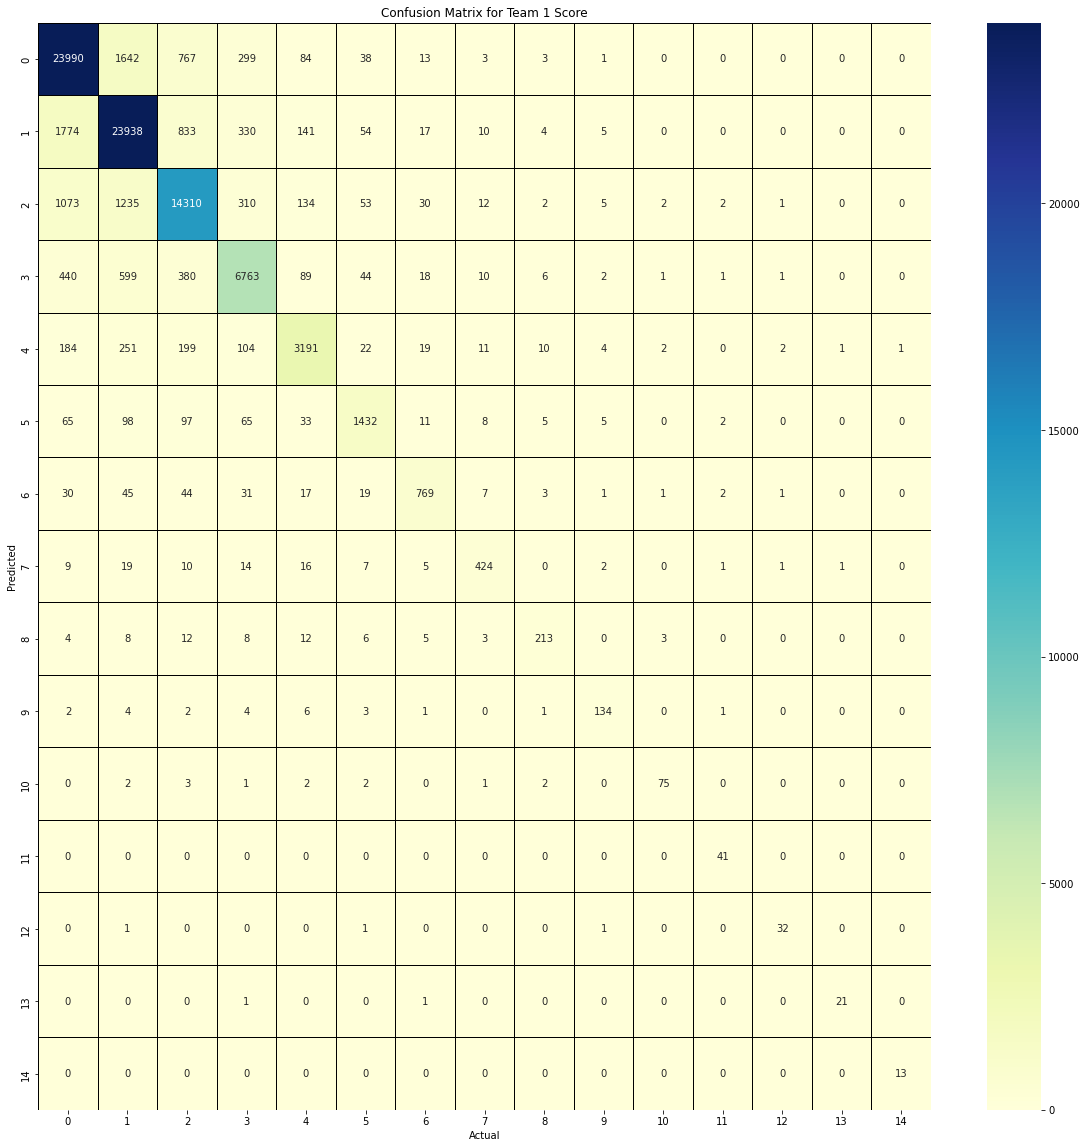

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(cm1, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for Team 1 Score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [35]:
from sklearn.metrics import classification_report
report_1=classification_report(Y.iloc[:,0],score_team_1)
print(report_1)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     26840
           1       0.86      0.88      0.87     27106
           2       0.86      0.83      0.85     17169
           3       0.85      0.81      0.83      8354
           4       0.86      0.80      0.83      4001
           5       0.85      0.79      0.82      1821
           6       0.87      0.79      0.83       970
           7       0.87      0.83      0.85       509
           8       0.86      0.78      0.81       274
           9       0.84      0.85      0.84       158
          10       0.89      0.85      0.87        88
          11       0.82      1.00      0.90        41
          12       0.84      0.91      0.88        35
          13       0.91      0.91      0.91        23
          14       0.93      1.00      0.96        13

    accuracy                           0.86     87402
   macro avg       0.86      0.86      0.86     87402
weighted avg       0.86   

Text(159.0, 0.5, 'Predicted')

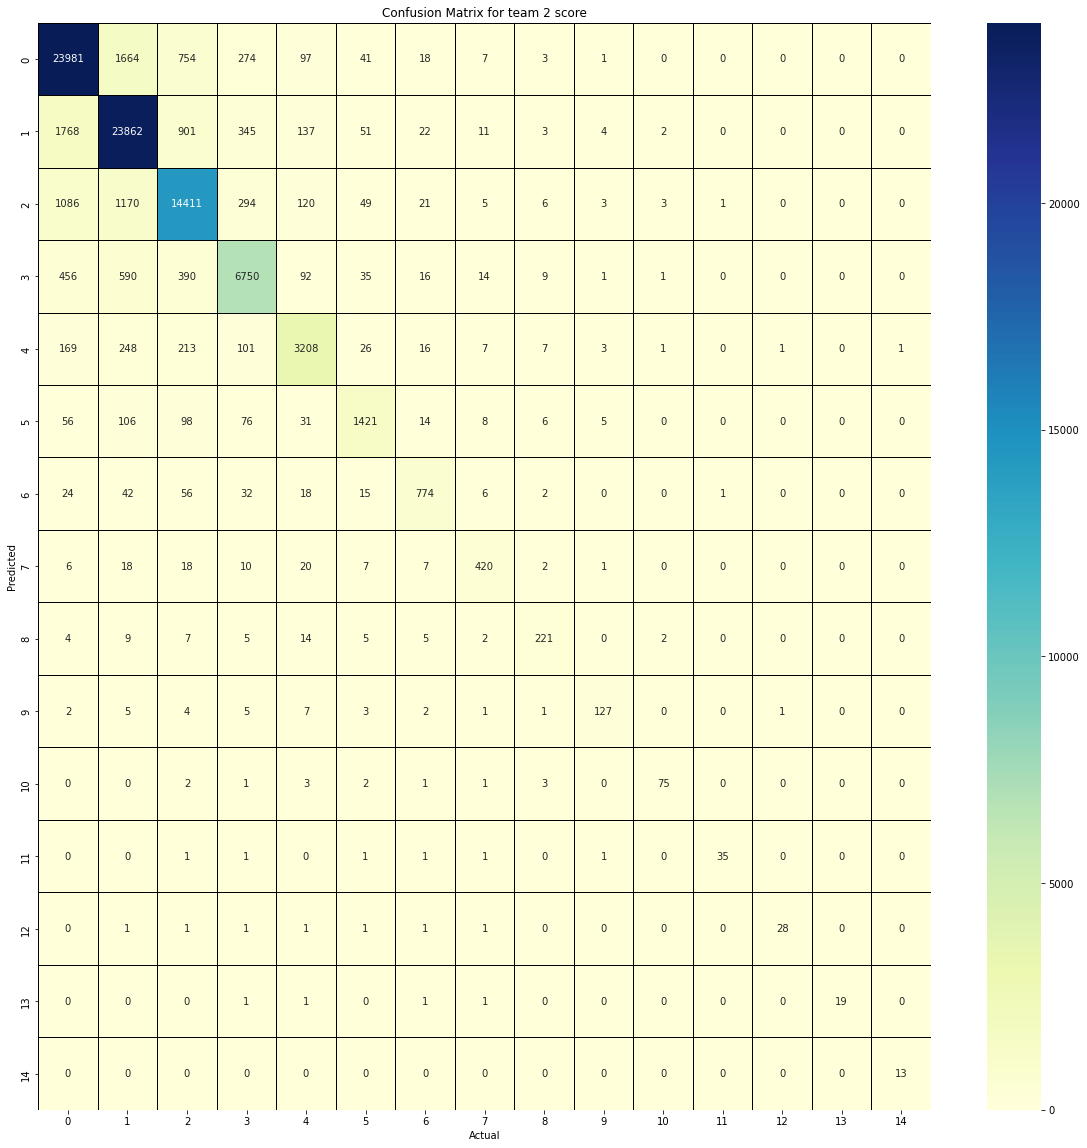

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(cm2, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for team 2 score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [37]:
report_2=classification_report(Y.iloc[:,1],score_team_2)
print(report_2)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     26840
           1       0.86      0.88      0.87     27106
           2       0.85      0.84      0.85     17169
           3       0.85      0.81      0.83      8354
           4       0.86      0.80      0.83      4001
           5       0.86      0.78      0.82      1821
           6       0.86      0.80      0.83       970
           7       0.87      0.83      0.85       509
           8       0.84      0.81      0.82       274
           9       0.87      0.80      0.84       158
          10       0.89      0.85      0.87        88
          11       0.95      0.85      0.90        41
          12       0.93      0.80      0.86        35
          13       1.00      0.83      0.90        23
          14       0.93      1.00      0.96        13

    accuracy                           0.86     87402
   macro avg       0.89      0.84      0.86     87402
weighted avg       0.86   

In [38]:
def select_winning_team(probability_array):
    prob_lst=[round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0]>prob_lst[1]):
        out=0
    elif (prob_lst[0]<prob_lst[1]):
        out=1
    elif (prob_lst[0]==prob_lst[1]):
        out=2
    return out,prob_lst

In [39]:
Group_A= ["Qatar","Ecuador","Senegal","Netherlands"]
Group_B= ["England","Iran","United States","Wales"]
Group_C= ["Argentina","Saudi Arabia","Mexico","Poland"]
Group_D= ["France","Australia","Denmark","Tunisia"]
Group_E= ["Spain","Costa Rica","Germany","Japan"]
Group_F= ["Belgium","Canada","Morocco","Croatia"]
Group_G= ["Brazil","Serbia","Switzerland","Cameroon"]
Group_H= ["Portugal","Ghana","Uruguay","South Korea"]
Groups={"Group A":Group_A,"Group B":Group_B,"Group C":Group_C,"Group D":Group_D,"Group E":Group_E,"Group F":Group_F,"Group G":Group_G,"Group H":Group_H}

In [40]:
year=2022
stadium="Qatar"
stadium_num=label_encoder.transform([stadium])[0]
host_num=stadium_num

In [41]:
Group_standings={}
for grp_name in list(Groups.keys()):
    print(f"{grp_name} Matches")
    probable_countries=Groups[grp_name]
    team_wins_dct={}
    goal_scored_dct={}
    goal_against_dct={}
    win_dct={}
    draw_dct={}
    lost_dct={}
    for i in range(len(probable_countries)):
        j=i+1
        team_1=probable_countries[i]
        team_1_num=label_encoder.transform([team_1])[0]
        team_wins=0
        while j<len((probable_countries)):
            team_2=probable_countries[j]
            team_2_num=label_encoder.transform([team_2])[0]
            team_lst=[team_1,team_2]
            Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num]])
            res=model.predict(Input_vector)

            win,prob_lst=select_winning_team(res)
            goal_scored_dct[team_1] = goal_scored_dct.get(team_1,0)+prob_lst[0]
            goal_scored_dct[team_2] = goal_scored_dct.get(team_2,0)+prob_lst[1]

            goal_against_dct[team_1] = goal_against_dct.get(team_1,0)+prob_lst[1]
            goal_against_dct[team_2] = goal_against_dct.get(team_2,0)+prob_lst[0]

            try:
                print(f" {team_1} vs {team_2} \n  Results of the Match {res[0]}\n   {team_lst[win]} wins 🎊🏆⚽🎖️\n")
                if (win)==0:
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+2
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)
                    
                    win_dct[team_1] = win_dct.get(team_1,0)+1
                    win_dct[team_2] = win_dct.get(team_2,0)
                    lost_dct[team_2] = lost_dct.get(team_2,0)+1
                    lost_dct[team_1] = lost_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)

                elif (win)==1:
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+2
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)
                    
                    win_dct[team_2] = win_dct.get(team_2,0)+1
                    win_dct[team_1] = win_dct.get(team_1,0)
                    lost_dct[team_1] = lost_dct.get(team_1,0)+1
                    lost_dct[team_2] = lost_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)

            except IndexError:
                print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\n   Match Draw ⚽⚽⚽\n") 
                team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+1
                team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+1
                
                draw_dct[team_1] = draw_dct.get(team_1,0)+1
                draw_dct[team_2] = draw_dct.get(team_2,0)+1
                
                win_dct[team_1] = win_dct.get(team_1,0)
                lost_dct[team_1] = lost_dct.get(team_1,0)
                
                win_dct[team_2] = win_dct.get(team_2,0)
                lost_dct[team_2] = lost_dct.get(team_2,0)
                    
            j=j+1
    group_results=[win_dct,draw_dct,lost_dct,team_wins_dct,goal_scored_dct,goal_against_dct]
    Group_standings[grp_name]=group_results

Group A Matches
Qatar vs Ecuador 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

 Qatar vs Senegal 
  Results of the Match [0 1]
   Senegal wins 🎊🏆⚽🎖️

Qatar vs Netherlands 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

Ecuador vs Senegal 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Ecuador vs Netherlands 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

 Senegal vs Netherlands 
  Results of the Match [2 0]
   Senegal wins 🎊🏆⚽🎖️

Group B Matches
 England vs Iran 
  Results of the Match [0 1]
   Iran wins 🎊🏆⚽🎖️

 England vs United States 
  Results of the Match [0 1]
   United States wins 🎊🏆⚽🎖️

England vs Wales 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

 Iran vs United States 
  Results of the Match [1 0]
   Iran wins 🎊🏆⚽🎖️

 Iran vs Wales 
  Results of the Match [1 0]
   Iran wins 🎊🏆⚽🎖️

 United States vs Wales 
  Results of the Match [1 0]
   United States wins 🎊🏆⚽🎖️

Group C Matches
 Argentina vs Saudi Arabia 
  Results of the Match [1 0]
   Argentina wins 🎊🏆⚽🎖️

 Argent

In [42]:
for grp_name in list(Group_standings.keys()):

    team_wins_dct= dict(sorted(Group_standings[grp_name][3].items()))
    goal_scored_dct=dict(sorted(Group_standings[grp_name][4].items()))
    goal_against_dct=dict(sorted(Group_standings[grp_name][5].items()))
    
    win_dct=dict(sorted(Group_standings[grp_name][0].items()))
    draw_dct=dict(sorted(Group_standings[grp_name][1].items()))
    lost_dct=dict(sorted(Group_standings[grp_name][2].items()))
    
    lst_teams=list(team_wins_dct.keys())
    
    win_lst=list(win_dct.values())
    draw_lst=list(draw_dct.values())
    lost_lst=list(lost_dct.values())
    
    lst_win_count=list(team_wins_dct.values())
    goal_scored=list(goal_scored_dct.values())
    goal_against=list(goal_against_dct.values())
    goal_differance=[goal_scored[i]-goal_against[i] for i in range (len(goal_scored))]
    ranking_table=pd.DataFrame(list(zip(lst_teams,win_lst,draw_lst,lost_lst,goal_scored,goal_against,goal_differance,lst_win_count)),columns=["Team","Wins","Draw","Lost","Goal Scored","Goal Against","Goal Differance","Points"])
    ranking_table=ranking_table.sort_values("Points",ascending=False).reset_index(drop=True)
    ranking_table.index = ranking_table.index + 1
    print(f"\n\n{grp_name} Final Rankings")
    print(ranking_table.to_markdown())



Group A Final Rankings
|    | Team        |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Senegal     |      2 |      1 |      0 |             3 |              0 |                 3 |        5 |
|  2 | Ecuador     |      0 |      3 |      0 |             2 |              2 |                 0 |        3 |
|  3 | Netherlands |      0 |      2 |      1 |             2 |              4 |                -2 |        2 |
|  4 | Qatar       |      0 |      2 |      1 |             2 |              3 |                -1 |        2 |


Group B Final Rankings
|    | Team          |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:--------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Iran          |      3 |      0 |      0 | 

In [43]:
qualified_teams_1=[]
standings=list(Group_standings.keys())
i=0
print(f"Round of 16\n")
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[0][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[1][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(team_lst[win])
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(winning_team)
    i=i+2
    
##Round of 16 Section_2
qualified_teams_2=[]
standings=list(Group_standings.keys())
i=0
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[1][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[0][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(winning_team)
    i=i+2

Round of 16

Senegal vs United States 
  Senegal wins 🏆🏆
    Senegal into the Quater-Finals ⏩⏩ 

Argentina vs Tunisia 
  Argentina wins 🏆🏆
    Argentina into the Quater-Finals ⏩⏩ 

Spain vs Canada 
  Match Draw ⚽⚽
   Canada wins at Penaly Shoot-Out 🥅🎯
    Canada into the Quater-Finals ⏩⏩ 

Brazil vs Ghana 
  Brazil wins 🏆🏆
    Brazil into the Quater-Finals ⏩⏩ 

Ecuador vs Iran 
  Match Draw ⚽⚽
   Ecuador wins at Penaly Shoot-Out 🥅🎯
    Ecuador into the Quater-Finals ⏩⏩ 

Saudi Arabia vs Australia 
  Australia wins 🏆🏆
    Australia into the Quater-Finals ⏩⏩ 

Germany vs Belgium 
  Germany wins 🏆🏆
    Germany into the Quater-Finals ⏩⏩ 

Serbia vs Portugal 
  Serbia wins 🏆🏆
    Serbia into the Quater-Finals ⏩⏩ 



In [44]:
print(f"Teams selected to the Quater Finals - {qualified_teams_1+qualified_teams_2}")


Teams selected to the Quater Finals - ['Senegal', 'Argentina', 'Canada', 'Brazil', 'Ecuador', 'Australia', 'Germany', 'Serbia']


In [45]:

Semifinal_teams=[]
i=0
print(f"Quater Final Matches\n")
while i < (len(qualified_teams_1))-1:
    team_1= qualified_teams_1[i]
    team_2= qualified_teams_1[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2
    
i=0
while i < (len(qualified_teams_2))-1:
    team_1= qualified_teams_2[i]
    team_2= qualified_teams_2[i+1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2

Quater Final Matches

Senegal vs Argentina 
  Argentina wins 🏆🏆
    Argentina into the Semi-Finals ⏩⏩ 

Canada vs Brazil 
  Match Draw ⚽⚽
   Brazil wins at Penaly Shoot-Out 🥅🎯
    Brazil into the Semi-Finals ⏩⏩ 

Ecuador vs Australia 
  Ecuador wins 🏆🏆
    Ecuador into the Semi-Finals ⏩⏩ 

Germany vs Serbia 
  Match Draw ⚽⚽
   Serbia wins at Penaly Shoot-Out 🥅🎯
    Serbia into the Semi-Finals ⏩⏩ 



In [46]:
print(f"Teams selected to the Semi-Finals - {Semifinal_teams}")

Teams selected to the Semi-Finals - ['Argentina', 'Brazil', 'Ecuador', 'Serbia']


In [47]:
final_teams=[]
third_place_match_teams=[]
i=0
print(f"Semi Final Matches\n")
while i < (len(Semifinal_teams))-1:
    team_1= Semifinal_teams[i]
    team_2= Semifinal_teams[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the FiIFA-Finals ⏩⏩ \n")
            final_teams.append(team_lst[win])
            third_place_match_teams.append(team_lst[(win+1)%2])

            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the FIFA-Finals ⏩⏩ \n")
            final_teams.append(winning_team)
            team_lst.remove(winning_team)
            third_place_match_teams.append(team_lst[0])
    i=i+2

Semi Final Matches

Argentina vs Brazil 
  Argentina wins 🏆🏆
    Argentina into the FiIFA-Finals ⏩⏩ 

Ecuador vs Serbia 
  Match Draw ⚽⚽
   Ecuador wins at Penaly Shoot-Out 🥅🎯
    Ecuador into the FIFA-Finals ⏩⏩ 



In [48]:
print(f"Teams selected to the Finals - {final_teams}")
print(f"Teams selected to the Third Place match - {third_place_match_teams}")

Teams selected to the Finals - ['Argentina', 'Ecuador']
Teams selected to the Third Place match - ['Brazil', 'Serbia']


In [49]:
print(f"FiIFA FINAl\n")
team_1= final_teams[1]
team_2= final_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} are the Winners 🎉🏆🎉\n\n")
    winner=team_lst[win]
    place_2=team_lst[(win+1)%2]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} are the Winners 🎉🏆🎉\n\n")
    winner=winning_team
    
    team_lst.remove(winning_team)
    place_2=team_lst[0]

print(f"Third Place match\n")
team_1= third_place_match_teams[1]
team_2= third_place_match_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=team_lst[win]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=winning_team
    

    
print(f"\n\nWinner is {winner} 🥇🥇🥇")
print(f"Runner-up is {place_2} 🥈🥈🥈")
print(f"3rd Place is {place_3} 🥉🥉🥉")

FiIFA FINAl

Ecuador vs Argentina 
  Match Draw ⚽⚽
   Argentina wins at Penaly Shoot-Out 🥅🎯
    Argentina are the Winners 🎉🏆🎉


Third Place match

Serbia vs Brazil 
  Serbia Wins the 3rd Place 🎉🏆🎉



Winner is Argentina 🥇🥇🥇
Runner-up is Ecuador 🥈🥈🥈
3rd Place is Serbia 🥉🥉🥉
